# Algorithmic-Trading-Stock-Price-Model

### Problem Statement
To predict the volatility of intraday stock market considering various parameters.

### Approach to the problem
* Live Data Collection using yfinance Library
* Pre processing the data for drawing insights in terms of stability of the company
* Visualizing the stock price of the company right from the date of listing till present graphically
* Developing a Model using LSTM( Type of Recurrent Neural Network)

### Need for this Model
Stock market price prediction is a difficult undertaking that generally requires a lot of human-computer interaction. Traditional batch processing methods cannot be used effectively for stock market analysis due to the linked nature of stock prices. We present an online learning technique that employs a recurrent neural network of some sort (RNN) called Long Short Term Memory (LSTM), which uses stochastic gradient descent to update the weights for individual data points. When compared to existing stock price prediction systems, this will yield more accurate results. With varying sizes of data, the network is trained and evaluated for accuracy, and the results are tallied. A comparison with respect to accuracy is then performed against an Artificial Neural Network

In [14]:
!pip install yfinance
!pip install yahoofinancials

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.18-py3-none-any.whl size=31921 sha256=263ecac48160e5b05086d5e43d5f9bdd73176ccf6bcfd117c63fc3e2e5eb891b
  Stored in directory: /root/.cache/pip/wheels/23/40/f5/6d6f4b19c65d4d7014ffcd6cca0bab1640cb31332adb1928a6
Successfully built yahoofinancials


In [92]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yahoofinancials import YahooFinancials

In [93]:
from sklearn.preprocessing import MinMaxScaler
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

## Using Apple Data

In [105]:
yahoo_financials = YahooFinancials('AAPL')
data = yahoo_financials.get_historical_price_data(start_date='2002-01-01',
                                                  end_date='2022-12-31',
                                                  time_interval='daily')

In [106]:
aapl_df = pd.DataFrame(data['AAPL']['prices'])
aapl_df.head()

,date,high,low,open,close,volume,adjclose,formatted_date
0,1009981800,0.416071,0.392143,0.393750,0.416071,529496800,0.352695,2002-01-02
1,1010068200,0.424107,0.406607,0.410714,0.421071,612007200,0.356933,2002-01-03
2,1010154600,0.427679,0.410536,0.416786,0.423036,409976000,0.358599,2002-01-04
3,1010413800,0.428571,0.406250,0.423571,0.408929,444584000,0.346641,2002-01-07
4,1010500200,0.411607,0.401071,0.406250,0.403750,450038400,0.342251,2002-01-08


In [107]:
aapl_df.shape

(5287, 8)

In [108]:
aapl_df = aapl_df.drop('date', axis=1)
aapl_df.rename(columns= {"formatted_date": "Date"}, inplace= True)
aapl_df.Date.dtype

dtype('O')

In [109]:
aapl_df.Date = pd.to_datetime(aapl_df["Date"])
aapl_df.Date.dtype

dtype('<M8[ns]')

In [110]:
aapl_df.set_index(['Date'], inplace= True)
aapl_df

,high,low,open,close,volume,adjclose
Date,,,,,,
2002-01-02,0.416071,0.392143,0.393750,0.416071,529496800,0.352695
2002-01-03,0.424107,0.406607,0.410714,0.421071,612007200,0.356933
2002-01-04,0.427679,0.410536,0.416786,0.423036,409976000,0.358599
2002-01-07,0.428571,0.406250,0.423571,0.408929,444584000,0.346641
2002-01-08,0.411607,0.401071,0.406250,0.403750,450038400,0.342251
...,...,...,...,...,...,...
2022-12-23,132.419998,129.639999,130.919998,131.860001,63814900,131.127060
2022-12-27,131.410004,128.720001,131.380005,130.029999,69007800,129.307220
2022-12-28,131.029999,125.870003,129.669998,126.040001,85438400,125.339409


### Historical Data Visualization

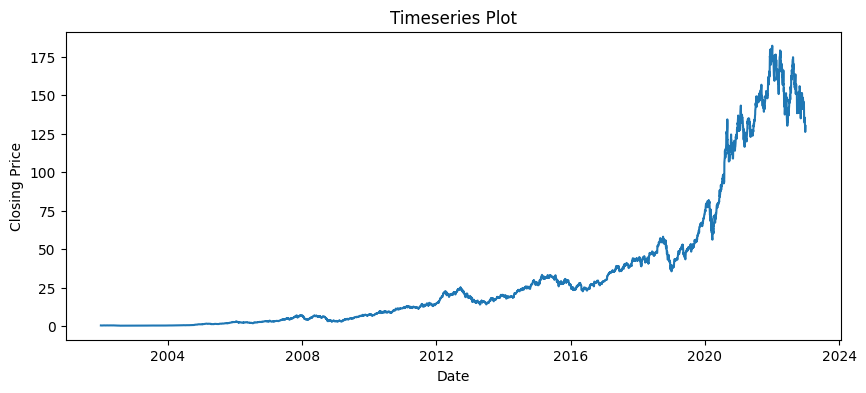

In [111]:
plt.figure(figsize= (10, 4))
plt.title("Timeseries Plot")
plt.plot(aapl_df['close'])
plt.xlabel('Date', fontsize= 10)
plt.ylabel('Closing Price', fontsize= 10)
plt.show()

In [112]:
data = aapl_df.filter(['close'])
df = np.array(data).reshape(-1, 1)
df

array([[  0.416071  ],
       [  0.42107099],
       [  0.42303601],
       ...,
       [126.04000092],
       [129.61000061],
       [129.92999268]])

In [113]:
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_df = scaler.fit_transform(np.array(df).reshape(-1, 1))
scaled_df

array([[0.00100005],
       [0.00102756],
       [0.00103837],
       ...,
       [0.69209311],
       [0.71173269],
       [0.71349306]])

In [114]:
len(scaled_df)

5287

In [115]:
train_df_len = math.ceil(len(scaled_df)*0.7)
train_df_len

3701

In [116]:
train_data = scaled_df[0: train_df_len, : ]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60: i, 0])
  y_train.append(train_data[i, 0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.00100005, 0.00102756, 0.00103837, 0.00096076, 0.00093227,
       0.00083796, 0.0007967 , 0.00077902, 0.00078885, 0.00084287,
       0.00075249, 0.0009195 , 0.00088905, 0.00085466, 0.00097254,
       0.00099121, 0.00099514, 0.00099711, 0.00097746, 0.00107766,
       0.00113955, 0.0011091 , 0.00120144, 0.00121126, 0.00113464,
       0.00109829, 0.00107177, 0.00116509, 0.00113857, 0.00116804,
       0.00112776, 0.001059  , 0.00093325, 0.00098335, 0.00082323,
       0.00094504, 0.00105016, 0.0010364 , 0.00086842, 0.00084287,
       0.00101479, 0.00109731, 0.00102265, 0.00107569, 0.00110615,
       0.00113366, 0.00117295, 0.00113955, 0.00111695, 0.00111106,
       0.00116215, 0.00114152, 0.00115232, 0.0011592 , 0.00109534,
       0.00107766, 0.00100496, 0.00101577, 0.00101675, 0.0010364 ])]
[0.001114010239620476]



In [117]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape, y_train.shape

((3641, 60), (3641,))

In [118]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(3641, 60, 1)

### Modelling

In [119]:
model = Sequential()
model.add(LSTM(20, return_sequences= True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(60, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [120]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 20)            1760      
                                                                 
 lstm_3 (LSTM)               (None, 60)                19440     
                                                                 
 dense_2 (Dense)             (None, 25)                1525      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 22751 (88.87 KB)
Trainable params: 22751 (88.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


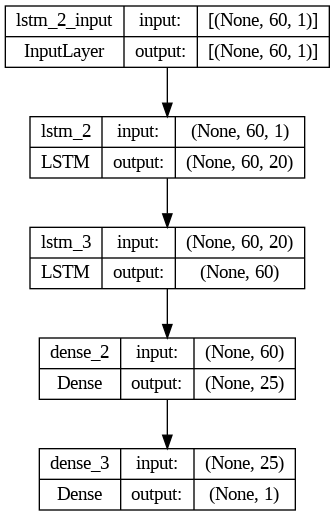

In [121]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [122]:
model.compile(optimizer= 'adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, batch_size= 20, epochs= 30)

Epoch 1/30
183/183 [==============================] - 16s 57ms/step - loss: 1.0576e-04
Epoch 2/30
183/183 [==============================] - 11s 57ms/step - loss: 1.2457e-05
Epoch 3/30
183/183 [==============================] - 11s 62ms/step - loss: 1.1854e-05
Epoch 4/30
183/183 [==============================] - 11s 62ms/step - loss: 1.1496e-05
Epoch 5/30
183/183 [==============================] - 10s 54ms/step - loss: 1.3359e-05
Epoch 6/30
183/183 [==============================] - 11s 60ms/step - loss: 9.8409e-06
Epoch 7/30
183/183 [==============================] - 11s 61ms/step - loss: 9.3669e-06
Epoch 8/30
183/183 [==============================] - 11s 60ms/step - loss: 9.5181e-06
Epoch 9/30
183/183 [==============================] - 10s 53ms/step - loss: 7.2441e-06
Epoch 10/30
183/183 [==============================] - 11s 62ms/step - loss: 1.0119e-05
Epoch 11/30
183/183 [==============================] - 11s 62ms/step - loss: 8.4540e-06
Epoch 12/30
183/183 [====================

In [123]:
test_data = scaled_df[train_df_len - 60: , :]
x_test = []
y_test = df[train_df_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60: i, 0])

In [124]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [125]:
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)
rmse = np.sqrt(np.mean(pred - y_test)**2)
rmse

50/50 [==============================] - 2s 16ms/step


2.189942643741641

### Visualization of Test and Predicted Data

<ipython-input-126-a5ec03a37fb0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['pred'] = pred;


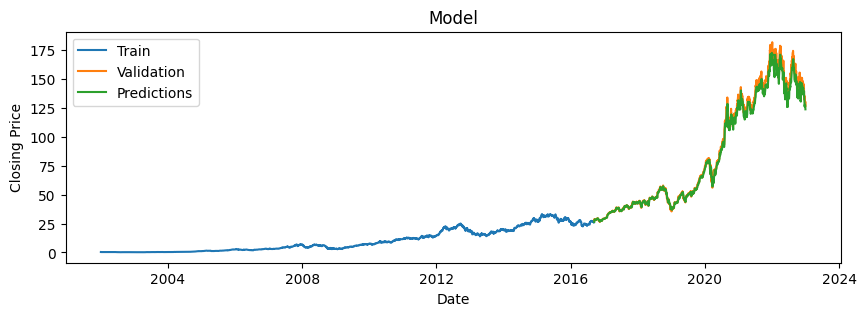

In [126]:
train = data[: train_df_len]
val = data[train_df_len: ]
val['pred'] = pred;
plt.figure(figsize = (10, 3))
plt.title('Model')
plt.xlabel("Date", fontsize= 10)
plt.ylabel("Closing Price", fontsize= 10)
plt.plot(train["close"])
plt.plot(val[['close', 'pred']], )
plt.legend(['Train', 'Validation', 'Predictions'])
plt.show()

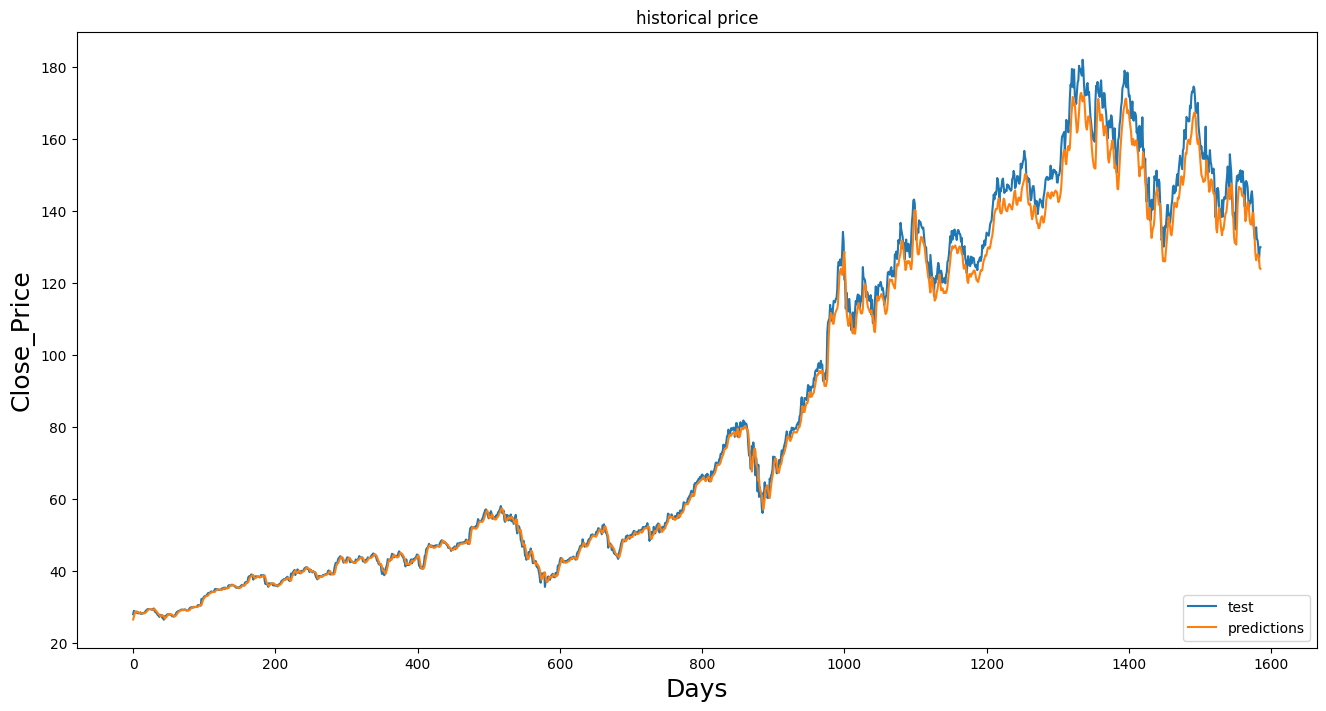

In [127]:
test = df[train_df_len:]
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(test)
plt.plot(pred)
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.legend(['test', 'predictions'], loc = 'lower right')
plt.show()

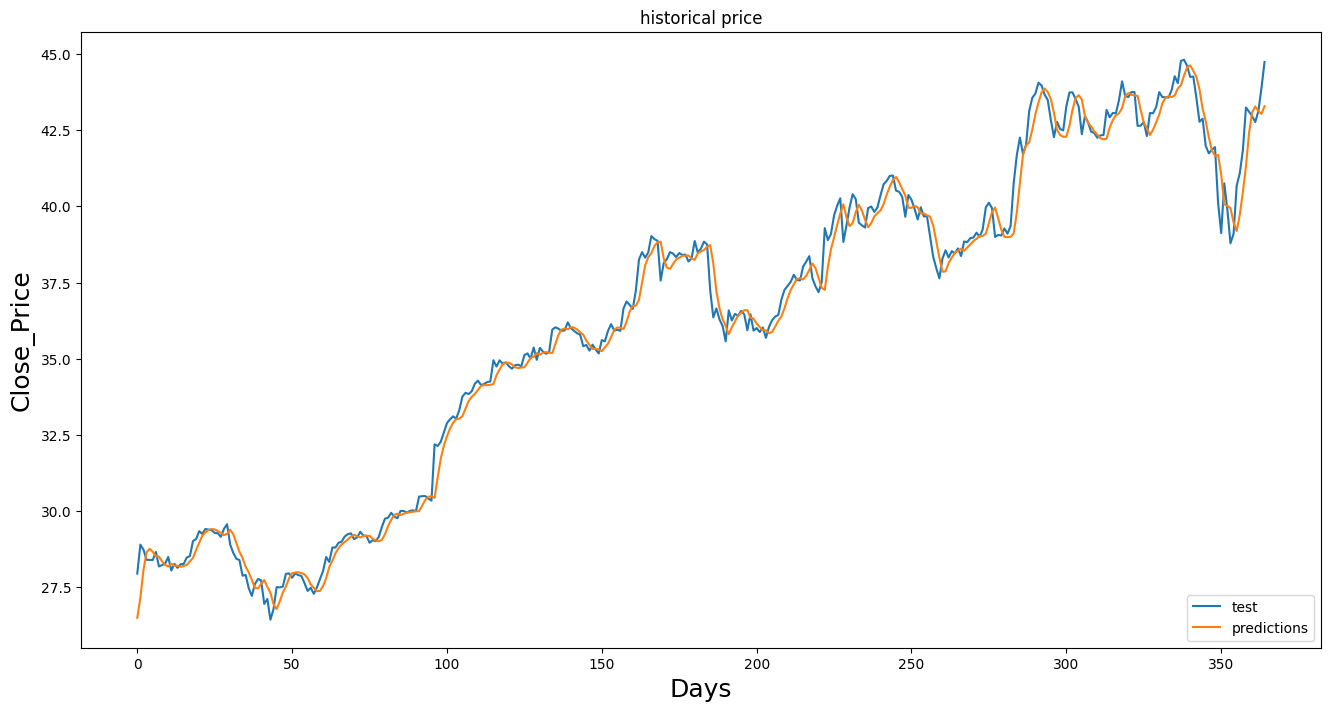

In [128]:
test = df[train_df_len:]
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(test[: 365])
plt.plot(pred[: 365])
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.legend(['test', 'predictions'], loc = 'lower right')
plt.show()

## Using Samsung Data

In [129]:
yahoo_financials = YahooFinancials('KS')
data = yahoo_financials.get_historical_price_data(start_date='2002-01-01',
                                                  end_date='2022-12-31',
                                                  time_interval='daily')

In [130]:
sam_df = pd.DataFrame(data['KS']['prices'])
sam_df.head()

,date,high,low,open,close,volume,adjclose,formatted_date
0,1363786200,0.120,0.120,0.120,0.120,8800.0,0.120,2013-03-20
1,1363872600,0.145,0.110,0.135,0.135,52400.0,0.135,2013-03-21
2,1363959000,0.135,0.115,0.135,0.115,7700.0,0.115,2013-03-22
3,1364218200,0.110,0.110,0.110,0.110,8000.0,0.110,2013-03-25
4,1364304600,0.130,0.130,0.130,0.130,1000.0,0.130,2013-03-26


In [131]:
sam_df.shape

(2465, 8)

In [132]:
sam_df = sam_df.drop('date', axis=1)
sam_df.rename(columns= {"formatted_date": "Date"}, inplace= True)
sam_df.Date.dtype

dtype('O')

In [133]:
sam_df.Date = pd.to_datetime(sam_df["Date"])
sam_df.Date.dtype

dtype('<M8[ns]')

In [134]:
sam_df.set_index(['Date'], inplace= True)
sam_df

,high,low,open,close,volume,adjclose
Date,,,,,,
2013-03-20,0.120,0.120,0.120,0.120,8800.0,0.120
2013-03-21,0.145,0.110,0.135,0.135,52400.0,0.135
2013-03-22,0.135,0.115,0.135,0.115,7700.0,0.115
2013-03-25,0.110,0.110,0.110,0.110,8000.0,0.110
2013-03-26,0.130,0.130,0.130,0.130,1000.0,0.130
...,...,...,...,...,...,...
2022-12-23,0.040,0.040,0.040,0.040,73000.0,0.040
2022-12-27,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-28,0.040,0.040,0.040,0.040,174000.0,0.040


### Historical Data Visualization

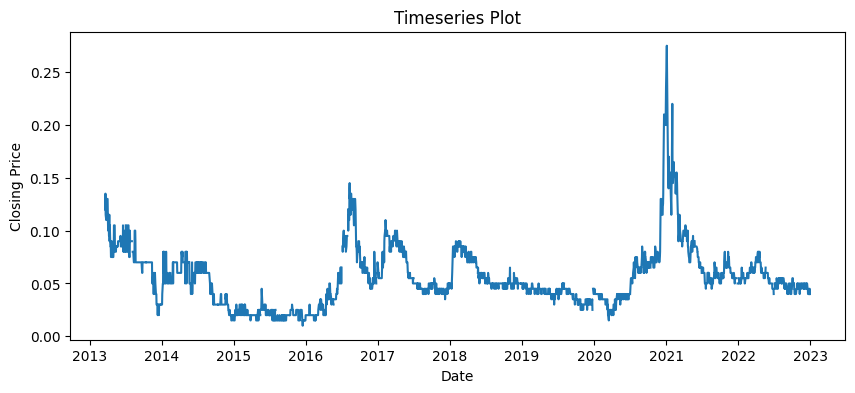

In [135]:
plt.figure(figsize= (10, 4))
plt.title("Timeseries Plot")
plt.plot(sam_df['close'])
plt.xlabel('Date', fontsize= 10)
plt.ylabel('Closing Price', fontsize= 10)
plt.show()

In [136]:
data = sam_df.filter(['close'])
df = np.array(data).reshape(-1, 1)
df

array([[0.12      ],
       [0.13500001],
       [0.115     ],
       ...,
       [0.04      ],
       [0.045     ],
       [0.04      ]])

In [137]:
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_df = scaler.fit_transform(np.array(df).reshape(-1, 1))
scaled_df

array([[0.41509432],
       [0.47169812],
       [0.39622641],
       ...,
       [0.11320754],
       [0.13207548],
       [0.11320754]])

In [138]:
len(scaled_df)

2465

In [139]:
train_df_len = math.ceil(len(scaled_df)*0.7)
train_df_len

1726

In [140]:
train_data = scaled_df[0: train_df_len, : ]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60: i, 0])
  y_train.append(train_data[i, 0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.41509432, 0.47169812, 0.39622641, 0.37735848, 0.45283016,
       0.45283016, 0.45283016, 0.45283016, 0.39622641, 0.35849055,
       0.33962264, 0.39622641, 0.32075471, 0.39622641, 0.39622641,
       0.3018868 , 0.35849055, 0.28301887, 0.28301887, 0.28301887,
       0.24528303, 0.24528303, 0.3018868 , 0.24528303, 0.24528303,
       0.24528303, 0.24528303, 0.24528303, 0.24528303, 0.26415093,
       0.26415093, 0.35849055, 0.35849055, 0.35849055, 0.28301887,
       0.26415093, 0.26415093, 0.26415093, 0.28301887, 0.28301887,
       0.28301887, 0.28301887,        nan, 0.28301887, 0.28301887,
       0.28301887, 0.3018868 , 0.3018868 , 0.3018868 , 0.3018868 ,
       0.3018868 , 0.3018868 , 0.3018868 , 0.32075471, 0.32075471,
       0.28301887, 0.28301887, 0.28301887, 0.28301887, 0.28301887])]
[0.2830188655373719]



In [141]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape, y_train.shape

((1666, 60), (1666,))

In [142]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1666, 60, 1)

### Modelling

In [143]:
model = Sequential()
model.add(LSTM(20, return_sequences= True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(60, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [144]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 20)            1760      
                                                                 
 lstm_5 (LSTM)               (None, 60)                19440     
                                                                 
 dense_4 (Dense)             (None, 25)                1525      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 22751 (88.87 KB)
Trainable params: 22751 (88.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


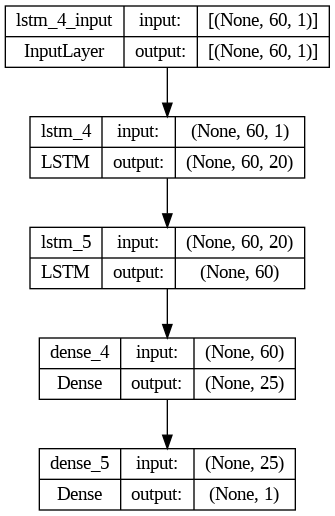

In [145]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [146]:
model.compile(optimizer= 'adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, batch_size= 20, epochs= 30)

Epoch 1/30
84/84 [==============================] - 11s 73ms/step - loss: nan
Epoch 2/30
84/84 [==============================] - 4s 51ms/step - loss: nan
Epoch 3/30
84/84 [==============================] - 4s 51ms/step - loss: nan
Epoch 4/30
84/84 [==============================] - 6s 73ms/step - loss: nan
Epoch 5/30
84/84 [==============================] - 4s 53ms/step - loss: nan
Epoch 6/30
84/84 [==============================] - 4s 53ms/step - loss: nan
Epoch 7/30
84/84 [==============================] - 6s 73ms/step - loss: nan
Epoch 8/30
84/84 [==============================] - 4s 51ms/step - loss: nan
Epoch 9/30
84/84 [==============================] - 4s 52ms/step - loss: nan
Epoch 10/30
84/84 [==============================] - 6s 73ms/step - loss: nan
Epoch 11/30
84/84 [==============================] - 4s 52ms/step - loss: nan
Epoch 12/30
84/84 [==============================] - 4s 51ms/step - loss: nan
Epoch 13/30
84/84 [==============================] - 6s 73ms/step - loss

In [147]:
test_data = scaled_df[train_df_len - 60: , :]
x_test = []
y_test = df[train_df_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60: i, 0])

In [148]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [149]:
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)
rmse = np.sqrt(np.mean(pred - y_test)**2)
rmse

24/24 [==============================] - 1s 15ms/step


nan

### Visualization of Test and Predicted Data

<ipython-input-126-a5ec03a37fb0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['pred'] = pred;


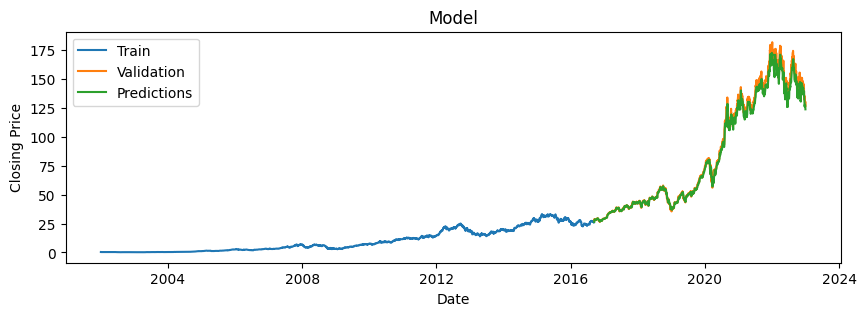

In [ ]:
train = data[: train_df_len]
val = data[train_df_len: ]
val['pred'] = pred;
plt.figure(figsize = (10, 3))
plt.title('Model')
plt.xlabel("Date", fontsize= 10)
plt.ylabel("Closing Price", fontsize= 10)
plt.plot(train["close"])
plt.plot(val[['close', 'pred']], )
plt.legend(['Train', 'Validation', 'Predictions'])
plt.show()

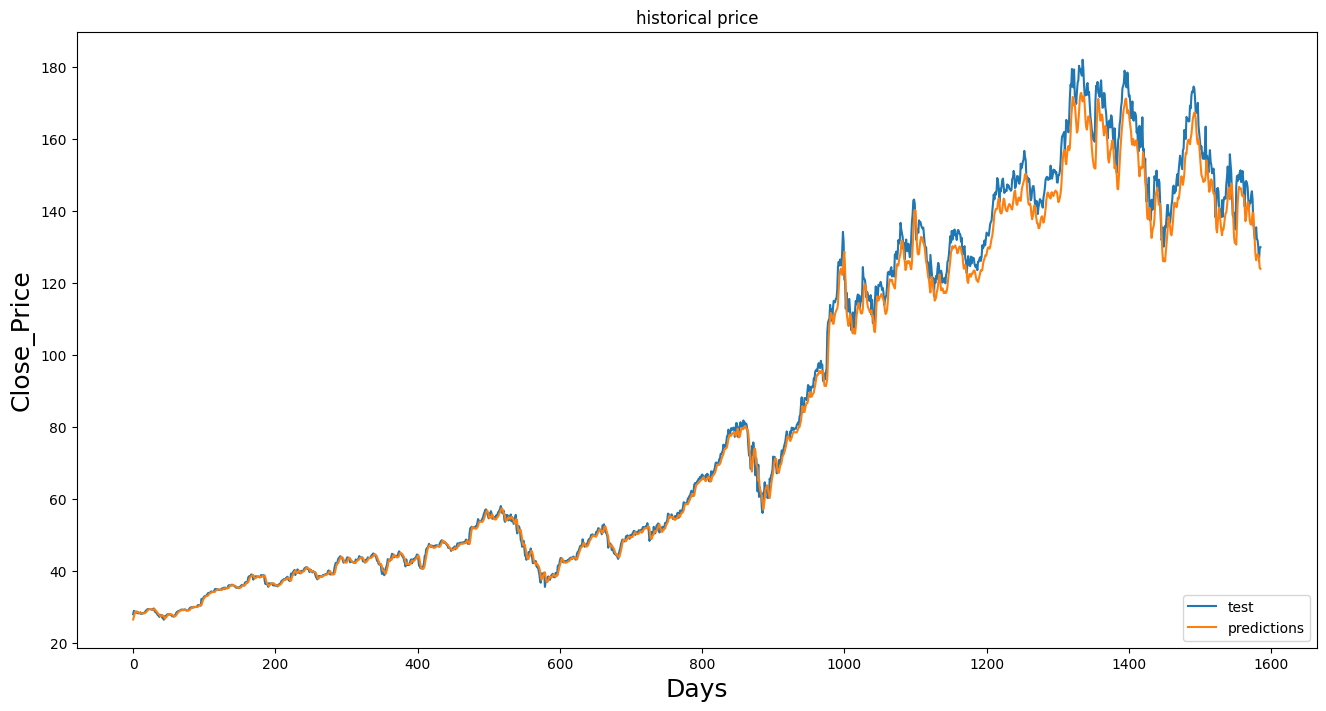

In [ ]:
test = df[train_df_len:]
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(test)
plt.plot(pred)
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.legend(['test', 'predictions'], loc = 'lower right')
plt.show()

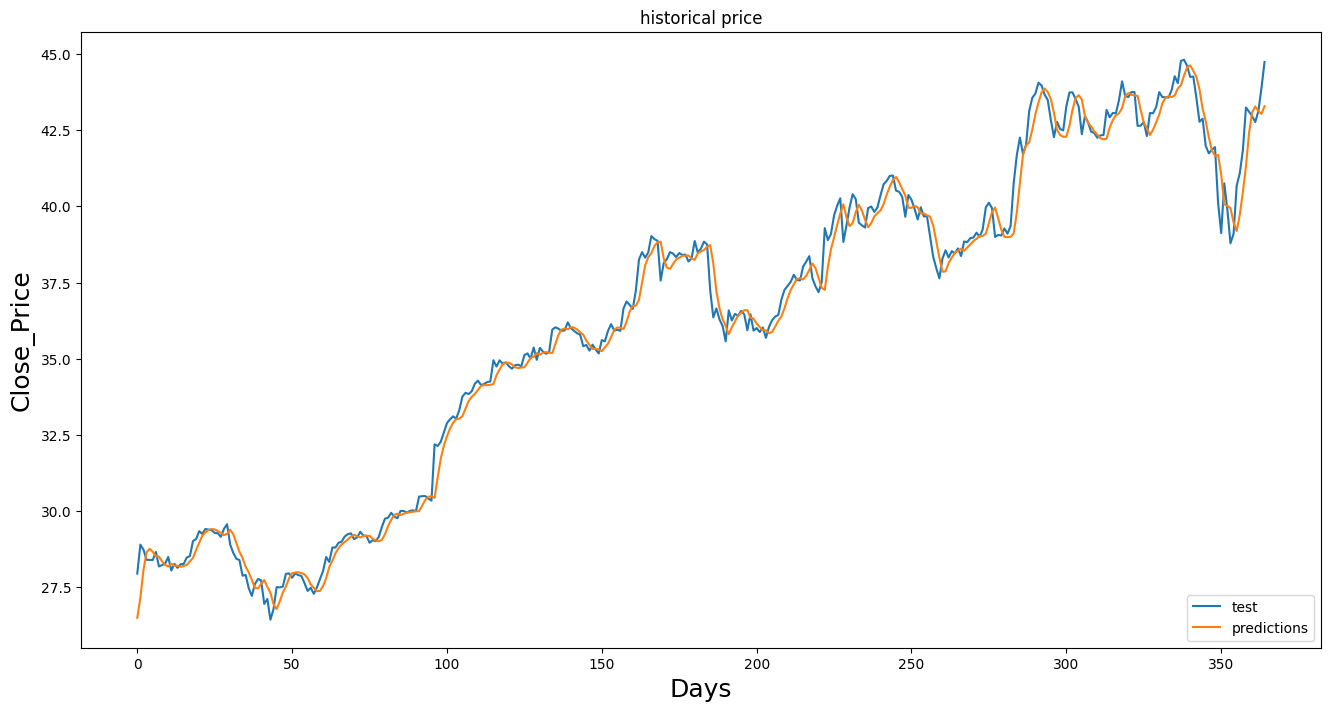

In [ ]:
test = df[train_df_len:]
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(test[: 365])
plt.plot(pred[: 365])
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.legend(['test', 'predictions'], loc = 'lower right')
plt.show()